In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [7]:
data_folder = '/content/mnt/MyDrive/results/CoffeeIndex'

In [2]:
sb = pd.read_csv(f'{data_folder}/스타벅스.csv')

sb.head()

,상호명,지점명,시도명,시군구명,도로명주소
0,스타벅스강릉안목항점,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153
2,스타벅스춘천후평DT점,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55
4,스타벅스설악워터피아점,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88


In [3]:
cb = pd.read_csv(f'{data_folder}/커피빈.csv')

cb.head()

,상호명,지점명,시도명,시군구명,도로명주소
0,커피빈,NaN,강원도,동해시,강원도 동해시 일출로 107
1,커피빈,코리아원주AK플라자점,강원도,원주시,강원도 원주시 봉화로 1
2,커피빈,현대프리미엄아울렛김포점,경기도,김포시,경기도 김포시 고촌읍 아라육로152번길 100
3,커피빈,중동현대백화점U-PLEX점,경기도,부천시,경기도 부천시 길주로 172
4,커피빈,코리아중동위브더스테이트점,경기도,부천시,경기도 부천시 신흥로 190


In [4]:
ed = pd.read_csv(f'{data_folder}/이디야.csv')

ed.head()

,상호명,지점명,시도명,시군구명,도로명주소
0,이디야커피,원주반곡동점,강원도,원주시,강원도 원주시 오리현길 16-9
1,이디야커피,춘천제일점,강원도,춘천시,강원도 춘천시 춘주로 89
2,이디야커피,흥업점,강원도,원주시,강원도 원주시 흥업면 남원로 85
3,이디야커피,속초동명항점,강원도,속초시,강원도 속초시 동명항길 49
4,이디야커피,정동진역점,강원도,강릉시,강원도 강릉시 강동면 정동역길 17


In [5]:
bd = pd.read_csv(f'{data_folder}/빽다방.csv')

bd.head()

,상호명,지점명,시도명,시군구명,도로명주소
0,빽다방,춘천석사CGV점,강원도,춘천시,강원도 춘천시 지석로 85
1,빽다방동해천곡점,동해천곡점,강원도,동해시,강원도 동해시 한섬로 111-7
2,빽다방,원주중앙1호점,강원도,원주시,강원도 원주시 원일로115번길 6
3,빽다방,삼척대학로점,강원도,삼척시,강원도 삼척시 대학로 23
4,빽다방,NaN,강원도,원주시,강원도 원주시 무실로12번길 33


## 고유 ID만들기

In [6]:
print(len(sb)), print(len(cb)), print(len(ed)), print(len(bd))

1547
290
2120
609


(None, None, None, None)

In [7]:
print(len(sb.시군구명.unique()))

174


In [8]:
sb.시군구명.unique()

array(['강릉시', '고성군', '춘천시', '속초시', '원주시', '평창군', '태백시', '인제군', '동해시',
       '홍천군', '횡성군', '성남시 분당구', '용인시 기흥구', '화성시', '수원시 팔달구', '고양시 일산동구',
       '김포시', '수원시', '파주시', '이천시', '광명시', '부천시', '안산시', '고양시 일산서구',
       '수원시 영통구', '안산시 상록구', '군포시', '포천시', '평택시', '의정부시', '고양시 덕양구',
       '남양주시', '용인시 처인구', '하남시', '동두천시', '과천시', '시흥시', '광주시', '의왕시',
       '안성시', '오산시', '양주시', '안양시 동안구', '양평군', '용인시 수지구', '수원시 장안구',
       '안양시 만안구', '수원시 권선구', '성남시 중원구', '성남시 수정구', '여주시', '안산시 단원구',
       '용인시', '구리시', '가평군', '진주시', '거제시', '김해시', '창원시 마산합포구', '창원시 성산구',
       '양산시', '창원시 의창구', '산청군', '사천시', '밀양시', '창원시 진해구', '창원시 마산회원구',
       '하동군', '창녕군', '함양군', '통영시', '구미시', '포항시 북구', '포항시 남구', '김천시',
       '영양군', '청도군', '고령군', '안동시', '경주시', '경산시', '영덕군', '문경시', '청송군',
       '서구', '동구', '광산구', '북구', '남구', '수성구', '달서구', '중구', '달성군', '유성구',
       '대덕구', '연제구', '사하구', '부산진구', '동래구', '해운대구', '사상구', '금정구', '강서구',
       '기장군', '수영구', '영도구', '종로구', '서초구', '영등포구', '강남구', '강북구', '중랑구',
       '마포구', '은평

In [9]:
# 고성군 - 고성(강원), 고성(경남)
# 광역시 - 서울 용산, 서울 서대문, 대전 서구, 대전 유성
# 행정구 - 수원 장안, 용인 수지, 고양 일산동, 창원 합포, 창원 회원
tmp_gu_dict = {
    '수원':['장안구', '권선구', '팔달구', '영통구'], 
    '성남':['수정구', '중원구', '분당구'], 
    '안양':['만안구', '동안구'], 
    '안산':['상록구', '단원구'], 
    '고양':['덕양구', '일산동구', '일산서구'], 
    '용인':['처인구', '기흥구', '수지구'], 
    '청주':['상당구', '서원구', '흥덕구', '청원구'], 
    '천안':['동남구', '서북구'], 
    '전주':['완산구', '덕진구'], 
    '포항':['남구', '북구'], 
    '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [10]:
metro_list = ['서울특별시','부산광역시','대구광역시','인천광역시','대전광역시','광주광역시','울산광역시']
cf_list = [sb, cb, ed, bd]

for y in cf_list:
  si_name = [None] * len(y)

  for i in y.index:
      if y.시도명[i] in metro_list:
          if len(y.시군구명[i]) == 2:
              si_name[i] = y.시도명[i][:2] + ' ' + y.시군구명[i]
          else:
              si_name[i] = y.시도명[i][:2] + ' ' + y.시군구명[i][:-1]     # 긴 구 이름에서 '구' 제외
      else:
          if y.시군구명[i][:-1] == '고성':
              if y.시도명[i] == '강원도':
                  si_name[i] = '고성(강원)'
              else:
                  si_name[i] = '고성(경남)'
          else:
              si_name[i] = y.시군구명[i][:-1]

          for key, values in tmp_gu_dict.items():
              if y.시군구명[i] in values:
                  if len(y.시군구명[i]) == 2:
                      si_name[i] = key + ' ' + y.시군구명[i]
                  elif y.시군구명[i] in ['마산합포구', '마산회원구']:
                      si_name[i] = key + ' ' + y.시군구명[i][2:-1]
                  else:
                      si_name[i] = key + ' ' + y.시군구명[i][:-1]
      y['ID'] = si_name

In [11]:
print(si_name)

['춘천', '동해', '원주', '삼척', '원주', '홍천', '원주', '원주', '춘천', '강릉', '강릉', '화천', '포천', '화성', '군포', '안양시 만안', '의왕', '성남시 분당', '남양주', '부천', '김포', '부천', '성남시 중원', '화성', '성남시 분당', '안양시 동안', '파주', '안양시 동안', '성남시 분당', '수원시 영통', '용인시 수지', '용인시 기흥', '안산시 상록', '구리', '시흥', '김포', '시흥', '의정부', '평택', '부천', '광주', '수원시 장안', '광명', '수원시 장안', '구리', '파주', '용인시 기흥', '용인시 기흥', '평택', '고양시 일산동', '김포', '용인시 처인', '성남시 분당', '부천', '군포', '하남', '성남시 수정', '파주', '안산', '안산시 단원', '성남시 분당', '시흥', '평택', '부천', '화성', '수원시 팔달', '고양시 덕양', '김포', '시흥', '파주', '성남시 분당', '용인시 기흥', '수원시 권선', '군포', '안양시 만안', '고양시 덕양', '성남시 수정', '화성', '군포', '안양시 만안', '부천', '용인시 기흥', '수원시 권선', '안산', '광주', '용인시 기흥', '성남시 분당', '성남시 분당', '평택', '의정부', '김포', '동두천', '부천', '고양시 일산서', '구리', '남양주', '수원시 장안', '파주', '고양시 덕양', '화성', '성남시 수정', '의정부', '부천', '이천', '의왕', '성남시 수정', '용인시 수지', '안산시 단원', '양주', '김포', '성남시 중원', '안양시 만안', '성남시 분당', '군포', '안산시 단원', '부천', '남양주', '광명', '고양시 일산동', '군포', '안양시 만안', '고양시 일산동', '파주', '용인시 기흥', '화성', '군포', '화성', '수원시 팔달', '군포', '시흥', '화성'

In [53]:
sb.head()

,상호명,지점명,시도명,시군구명,도로명주소,ID
0,스타벅스,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40,강릉
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원)
2,스타벅스,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318,춘천
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55,춘천
4,스타벅스,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88,속초


In [13]:
cb.head()

,상호명,지점명,시도명,시군구명,도로명주소,ID
0,커피빈,NaN,강원도,동해시,강원도 동해시 일출로 107,동해
1,커피빈,코리아원주AK플라자점,강원도,원주시,강원도 원주시 봉화로 1,원주
2,커피빈,현대프리미엄아울렛김포점,경기도,김포시,경기도 김포시 고촌읍 아라육로152번길 100,김포
3,커피빈,중동현대백화점U-PLEX점,경기도,부천시,경기도 부천시 길주로 172,부천
4,커피빈,코리아중동위브더스테이트점,경기도,부천시,경기도 부천시 신흥로 190,부천


In [14]:
ed.head()

,상호명,지점명,시도명,시군구명,도로명주소,ID
0,이디야커피,원주반곡동점,강원도,원주시,강원도 원주시 오리현길 16-9,원주
1,이디야커피,춘천제일점,강원도,춘천시,강원도 춘천시 춘주로 89,춘천
2,이디야커피,흥업점,강원도,원주시,강원도 원주시 흥업면 남원로 85,원주
3,이디야커피,속초동명항점,강원도,속초시,강원도 속초시 동명항길 49,속초
4,이디야커피,정동진역점,강원도,강릉시,강원도 강릉시 강동면 정동역길 17,강릉


In [52]:
bd.head()

,상호명,지점명,시도명,시군구명,도로명주소,ID
0,빽다방,춘천석사CGV점,강원도,춘천시,강원도 춘천시 지석로 85,춘천
1,빽다방,동해천곡점,강원도,동해시,강원도 동해시 한섬로 111-7,동해
2,빽다방,원주중앙1호점,강원도,원주시,강원도 원주시 원일로115번길 6,원주
3,빽다방,삼척대학로점,강원도,삼척시,강원도 삼척시 대학로 23,삼척
4,빽다방,NaN,강원도,원주시,강원도 원주시 무실로12번길 33,원주


In [48]:
sb['상호명'] = '스타벅스'
cb['상호명'] = '커피빈'
ed['상호명'] = '이디야'
bd['상호명'] = '빽다방'

In [49]:
sb.head()

,상호명,지점명,시도명,시군구명,도로명주소,ID
0,스타벅스,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40,강릉
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원)
2,스타벅스,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318,춘천
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55,춘천
4,스타벅스,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88,속초


In [17]:
sb.to_csv(f'{data_folder}/스타벅스ID.csv', index=False)
cb.to_csv(f'{data_folder}/커피빈ID.csv', index=False)
ed.to_csv(f'{data_folder}/이디야ID.csv', index=False)
bd.to_csv(f'{data_folder}/빽다방ID.csv', index=False)

In [65]:
sb.groupby("ID").size()

ID
가평     2
강릉     5
거제     6
경산     8
경주     8
      ..
하동     1
함양     1
홍천     2
화성    16
횡성     1
Length: 195, dtype: int64

In [81]:
sb_c = sb.pivot_table("상호명", "ID", aggfunc="count")
sb_c.rename(columns={'상호명':'스타벅스'}, inplace=True)
sb_c

,스타벅스
ID,
가평,2
강릉,5
거제,6
경산,8
경주,8
...,...
하동,1
함양,1
홍천,2


In [82]:
cb_c = cb.pivot_table("상호명", "ID", aggfunc="count")
cb_c.rename(columns={'상호명':'커피빈'}, inplace=True)
cb_c

,커피빈
ID,
경주,2
고양시 덕양,1
고양시 일산동,5
고양시 일산서,5
광명,1
...,...
포항시 북,1
하남,1
함안,2


In [83]:
ed_c = ed.pivot_table("상호명", "ID", aggfunc="count")
ed_c.rename(columns={'상호명':'이디야'}, inplace=True)
ed_c

,이디야
ID,
가평,9
강릉,15
강진,1
거제,9
거창,1
...,...
홍천,3
화성,28
화순,1


In [84]:
bd_c = bd.pivot_table("상호명", "ID", aggfunc="count")
bd_c.rename(columns={'상호명':'빽다방'}, inplace=True)
bd_c

,빽다방
ID,
강릉,2
거창,1
경산,4
경주,1
고성(경남),2
...,...
홍성,2
홍천,1
화성,10


In [85]:
coffee_all = pd.concat([sb_c, cb_c, ed_c, bd_c], axis=1)
coffee_all.head()

,스타벅스,커피빈,이디야,빽다방
가평,2.0,NaN,9.0,NaN
강릉,5.0,NaN,15.0,2.0
거제,6.0,NaN,9.0,NaN
경산,8.0,NaN,9.0,4.0
경주,8.0,2.0,25.0,1.0


In [91]:
coffee_all = coffee_all.fillna(0)
coffee_all = coffee_all.astype(int)
coffee_all.head()

,스타벅스,커피빈,이디야,빽다방
가평,2,0,9,0
강릉,5,0,15,2
거제,6,0,9,0
경산,8,0,9,4
경주,8,2,25,1


In [94]:
coffee_all['커피지수'] = np.round((coffee_all['스타벅스'] + coffee_all['커피빈']) / (coffee_all['이디야'] + coffee_all['빽다방']), 2)
coffee_all.head()

,스타벅스,커피빈,이디야,빽다방,커피지수
가평,2,0,9,0,0.22
강릉,5,0,15,2,0.29
거제,6,0,9,0,0.67
경산,8,0,9,4,0.62
경주,8,2,25,1,0.38


In [105]:
coffee_all.to_csv(f'{data_folder}/커피지수.csv', index=False)

## 커피지수 시각화

In [35]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [96]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data_folder = '/content/mnt/MyDrive/results/CoffeeIndex'
map_folder = '/content/mnt/MyDrive/data/인구소멸위기지역'

### 지도모양 보기

In [97]:
map_raw = pd.read_excel(f'{map_folder}/draw_korea_raw(2021).xlsx')
map_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [103]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
map.columns = ['y', 'x', 'ID']
print(map.shape)
map.head()

(250, 3)


,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [99]:
!cp $map_folder/draw_map.py .

In [100]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

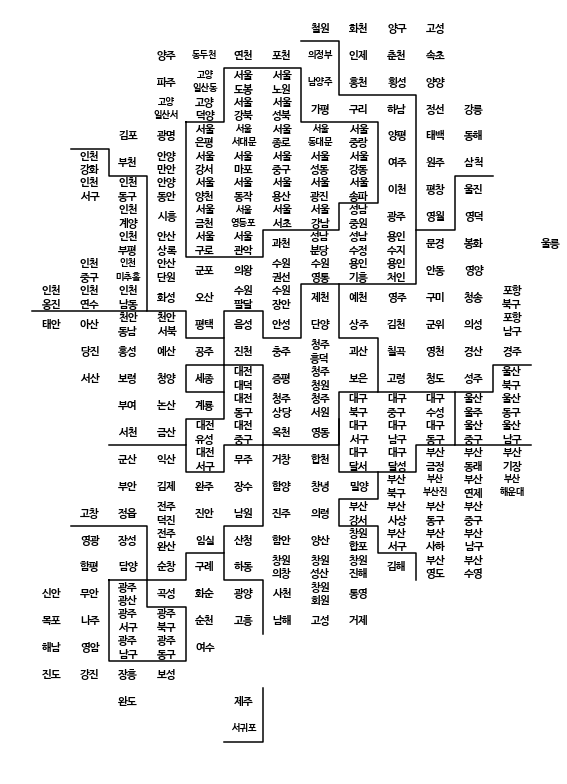

In [104]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [114]:
coffee_all.reset_index(drop=False, inplace=True)
coffee_all.columns = ['ID', '스타벅스', '커피빈', '이디야', '빽다방', '커피지수']
coffee_all

,ID,스타벅스,커피빈,이디야,빽다방,커피지수
0,가평,2,0,9,0,0.22
1,강릉,5,0,15,2,0.29
2,거제,6,0,9,0,0.67
3,경산,8,0,9,4,0.62
4,경주,8,2,25,1,0.38
...,...,...,...,...,...,...
240,태안,0,0,2,1,0.00
241,합천,0,0,1,0,0.00
242,홍성,0,0,1,2,0.00
243,화순,0,0,1,1,0.00


In [115]:
coffee = pd.merge(map, coffee_all, how='left', on='ID')
print(coffee.shape)
coffee.head()

(250, 8)


,y,x,ID,스타벅스,커피빈,이디야,빽다방,커피지수
0,0,7,철원,0.0,0.0,2.0,0.0,0.00
1,0,8,화천,0.0,0.0,1.0,1.0,0.00
2,0,9,양구,0.0,0.0,1.0,0.0,0.00
3,0,10,고성(강원),2.0,0.0,0.0,0.0,inf
4,1,3,양주,7.0,0.0,17.0,1.0,0.39


In [116]:
coffee.isnull().sum().sum()

210

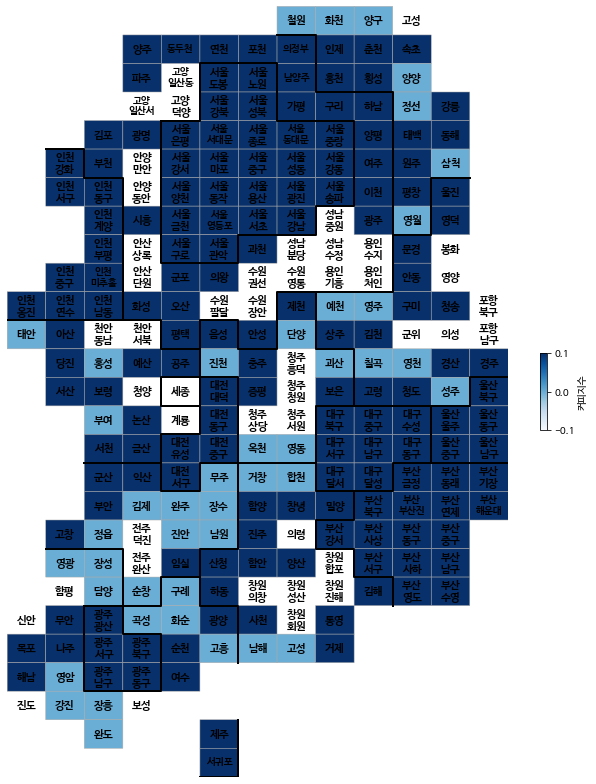

In [117]:
drawKorea('커피지수', coffee, 'Blues')